# Predictive Maintenance Model

## Objective
- Company has a fleet of devices transmitting daily aggregated telemetry attributes. Predictive maintenance techniques are designed to help determine the condition of in-service equipment in order to predict when maintenance should be performed.
This approach promises cost savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.

# Importing Modules

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
df = pd.read_csv("failure.csv")

# EDA - Exploratory Data Analysis

In [3]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [7]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


# Data Understanding and Data Visualization

In [8]:
df.failure.value_counts(normalize = True)

0    0.999149
1    0.000851
Name: failure, dtype: float64

#### There are lots of 0 samples but very few 1 samples. In other words, if we make a model that predicts everything 0, we will know with 99% accuracy, but we will miss the part that works for us. Here we see that our data is imbalanced. For this, we will apply the oversampling method.

In [9]:
df.attribute1.nunique()

123878

In [10]:
df.attribute1.unique()

array([215630672,  61370680, 173295968, ...,  19029120, 226953408,
        17572840], dtype=int64)

In [11]:
df.attribute2.nunique()

558

In [12]:
df.attribute2.unique()

array([   56,     0,  1536,   168,  5160,   392,  1984,   192,   496,
         928,  1952,   128,   744,   136,  7928,   360,     8,   464,
       21528,  1392,   352,  7448,   104,   528,   800,   520,  1888,
        1232,   368,  6336, 17408,  1056,  1160,  2288,  1184,    32,
       64728,   712,  7024,   424, 54896,  1080,  2336,  4960,  5560,
         992,   112,    72,    16,   792, 64776,  4768,   944,   600,
        6328,   160,  1064,  1552,  6264,   440,  4072,  4240,  1960,
         256,   736, 44008,  2000,   376,    24,    40,    80,   344,
        1936,   232, 24656,   728,   240,  1208,  7944,  7800,  1912,
        1248, 56736,   280,  6280,   512,  8392,   504, 21544,  8120,
        6128, 54752,   632,  1072,  6288,  2008,   680,  1944,  1592,
        2016,   752,   144, 21928,  8160,   808,  1152,  1176, 61592,
       47944,   120,  6352,  4248,  1656,  2024,   936,   760, 21944,
        1400,  8688,   816,  6360, 10096, 49768, 64784,   288,  1664,
        2096, 64736,

In [13]:
df.attribute3.nunique()

47

In [14]:
df.attribute3.unique()

array([    0,     3,     1,   323,   266,     2,    14,     9, 24929,
         382,  1326,     5,   406,  1331,    21,   208,   220,  2693,
          10,    12,   263,    72,   100,     8,   377,    11,     4,
          62,    25,    56,    34,    16,    61,     7,    18,    70,
         318,    15,    36,    53,   279,    24,    35,    38,   107,
        1162,  2112], dtype=int64)

In [15]:
df.attribute4.nunique()

115

In [16]:
df.attribute4.unique()

array([  52,    0,   41,    1,    9,  175,  521, 1074,   12,   23,    6,
          4,  529,   46,    8,    7,    2,    3,  331,   26,   14,   20,
         15,   13,   17,   27,   37,   10,   69,   76,   24,   73,   25,
          5,   51,   31,   34,   38,   16,   74,  112,   11,   49,   90,
        135,   79,  305,   91,  215,  763,  100, 1033,  186,   39,  235,
        841,  399,   40,  236,   57,  400,   43,  405,   45,  406,   60,
        214,   67,   18,  160,   19,   28,   29,   48,   58,   65,  108,
        204,   50,  118,   35,  122,  128,   36,   21,  147,   97,  256,
         56,  297,   62,  299,  300,  322,  401,   80,   95,   53,   30,
         55,  121,   22, 1666,   86,  173,  288,   32,  431,  486,  487,
        533,   44,   94,  129,  164], dtype=int64)

In [17]:
df.attribute5.nunique()

60

In [18]:
df.attribute5.unique()

array([ 6, 12, 15,  8, 19, 14,  9,  7,  2, 11,  3,  4,  5, 16, 13, 10, 92,
       70, 62, 58, 63, 65, 90, 67, 91, 95, 32, 39, 36, 17, 60, 24, 25, 18,
       23, 64, 98, 22, 21, 59, 35, 68, 29, 61, 33, 37, 20, 30, 40, 31, 38,
       66, 94, 78, 57, 89,  1, 34, 41, 42], dtype=int64)

In [19]:
df.attribute6.nunique()

44838

In [20]:
df.attribute6.unique()

array([407438, 403174, 237394, ..., 350410, 358980, 351431], dtype=int64)

In [21]:
df.attribute7.nunique()

28

In [22]:
df.attribute7.unique()

array([  0,  16,   8,  48,  32, 312,   6,  24,  40,  56,  96, 112, 136,
       152, 424, 240, 496, 744, 216,  72,  80, 176, 832, 128, 272, 736,
        22, 104], dtype=int64)

In [23]:
df.attribute8.nunique() 

28

In [24]:
df.attribute8.unique() # 7. ile aynı olduğunu görüyoruz o yüzden siliyoruz

array([  0,  16,   8,  48,  32, 312,   6,  24,  40,  56,  96, 112, 136,
       152, 424, 240, 496, 744, 216,  72,  80, 176, 832, 128, 272, 736,
        22, 104], dtype=int64)

In [25]:
df.device.nunique() # 1168 farklı device olduğunu görüyoruz

1168

C:\Users\yskaraman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='failure', ylabel='count'>

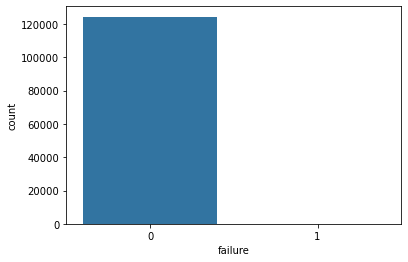

In [26]:
sns.countplot(df.failure)

<AxesSubplot:>

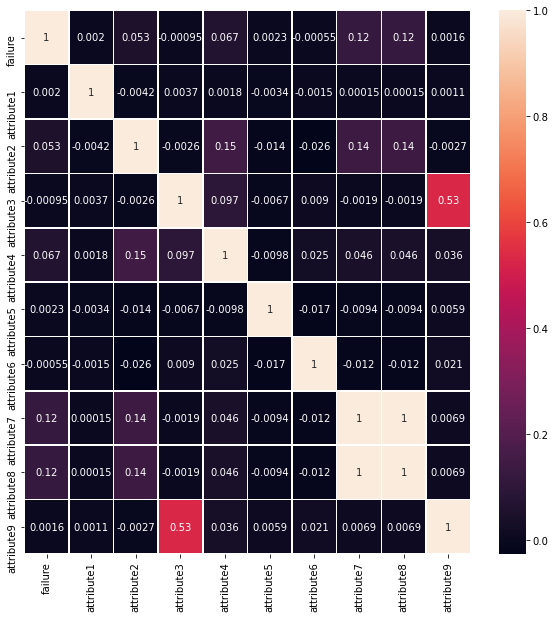

In [27]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)

In [28]:
abs(df.corr()["failure"]).sort_values(ascending = False)

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
Name: failure, dtype: float64

# Feature Engineering

In [29]:
df.groupby("device", as_index = False)["date"].nunique()

,device,date
0,S1F01085,6
1,S1F013BB,6
2,S1F0166B,6
3,S1F01E6Y,48
4,S1F01JE0,6
...,...,...
1163,Z1F1VMZB,292
1164,Z1F1VQFY,125
1165,Z1F26YZB,84
1166,Z1F282ZV,84


In [30]:
del df["attribute8"]

df["date"] = pd.to_datetime(df.date)
df["month"] = df.date.dt.month

del df["date"]

# We have added a seasonal column, as broken vehicles may be of seasonal origin.
df["season"] = np.where(df.month < 3, "winter", np.where(df.month < 6, "spring", np.where(df.month < 9, "summer", "fall")))

In [ ]:
del df["month"]

In [31]:
df

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,season
0,S1F01085,0,215630672,56,0,52,6,407438,0,7,winter
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,winter
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,winter
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,winter
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,winter
...,...,...,...,...,...,...,...,...,...,...,...
124489,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,fall
124490,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,fall
124491,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,fall
124492,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,fall


In [32]:
df = pd.get_dummies(df, drop_first = True)

In [33]:
X = df.drop("failure", axis = 1)
y = df["failure"]

In [34]:
X

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,device_S1F013BB,device_S1F0166B,device_S1F01E6Y,device_S1F01JE0,device_S1F01R2B,device_S1F01TD5,device_S1F01XDJ,device_S1F023H2,device_S1F02A0J,device_S1F02DZ2,device_S1F02EVN,device_S1F02L38,device_S1F02MGA,device_S1F02P76,device_S1F02VAX,device_S1F02W1L,device_S1F02WFT,device_S1F02XLX,device_S1F0318A,device_S1F0322R,device_S1F0330P,device_S1F03499,device_S1F035SJ,device_S1F0377V,device_S1F039FE,device_S1F03RV3,device_S1F03YZM,device_S1F044ET,device_S1F049RX,device_S1F04DH8,device_S1F04KSC,device_S1F04MVQ,device_S1F04R7Y,device_S1F04TS4,device_S1F04Y6C,device_S1F059G0,device_S1F05AFP,device_S1F05B1Q,device_S1F05NAJ,device_S1F05P51,device_S1F05P5Z,device_S1F06E04,...,device_Z1F16G31,device_Z1F16LDN,device_Z1F17XPD,device_Z1F17YTD,device_Z1F17Z3N,device_Z1F17ZCN,device_Z1F18YB3,device_Z1F18YST,device_Z1F1901P,device_Z1F19ENW,device_Z1F19KMH,device_Z1F19QH0,device_Z1F19QM3,device_Z1F19TP2,device_Z1F19TVX,device_Z1F19VF5,device_Z1F1A0CJ,device_Z1F1A0LM,device_Z1F1A0RP,device_Z1F1A1HH,device_Z1F1A7MG,device_Z1F1A83K,device_Z1F1AD0M,device_Z1F1AF54,device_Z1F1AFF2,device_Z1F1AFT5,device_Z1F1AG5N,device_Z1F1AGLA,device_Z1F1AGN5,device_Z1F1AGW1,device_Z1F1B6H4,device_Z1F1B6NP,device_Z1F1B799,device_Z1F1CZ35,device_Z1F1FCH5,device_Z1F1FZ9J,device_Z1F1HEQR,device_Z1F1HSWK,device_Z1F1Q9BD,device_Z1F1R76A,device_Z1F1RE71,device_Z1F1RJFA,device_Z1F1VMZB,device_Z1F1VQFY,device_Z1F26YZB,device_Z1F282ZV,device_Z1F2PBHX,season_spring,season_summer,season_winter
0,215630672,56,0,52,6,407438,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,61370680,0,3,0,6,403174,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,173295968,0,0,0,12,237394,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,79694024,0,0,0,6,410186,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,135970480,0,0,0,15,313173,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,18310224,0,0,0,10,353705,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124490,172556680,96,107,4,11,332792,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124491,19029120,4832,0,0,11,350410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124492,226953408,0,0,0,12,358980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
y

0         0
1         0
2         0
3         0
4         0
         ..
124489    0
124490    0
124491    0
124492    0
124493    0
Name: failure, Length: 124494, dtype: int64

# Oversampling

In [36]:
from imblearn.combine import SMOTETomek

# we are oversampling because our data is imbalanced
smk = SMOTETomek(random_state = 42)
X_, y_ = smk.fit_sample(X, y)

In [37]:
X_.shape, y_.shape

((236086, 1178), (236086,))

# Modeling and Predicting

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_,y_, test_size = 0.2, random_state = 42)

# Gaussian Naive Bayes Classifier

In [42]:
GNB = GaussianNB()

GNB.fit(X_train,y_train)

GaussianNB()

In [43]:
pred_GNB = GNB.predict(X_test)

In [44]:
f1_score(y_test, pred_GNB)

0.29487680876026595

In [45]:
confusion_matrix(y_test, pred_GNB)

array([[23238,   126],
       [19707,  4147]], dtype=int64)

In [46]:
print(classification_report(y_test, pred_GNB))

              precision    recall  f1-score   support

           0       0.54      0.99      0.70     23364
           1       0.97      0.17      0.29     23854

    accuracy                           0.58     47218
   macro avg       0.76      0.58      0.50     47218
weighted avg       0.76      0.58      0.50     47218



# Bernoulli Naive Bayes Classifier

In [47]:
BNB = BernoulliNB()

BNB.fit(X_train, y_train)

BernoulliNB()

In [48]:
pred_BNB = BNB.predict(X_test)

In [49]:
f1_score(y_test, pred_BNB)

0.9643261729186705

In [50]:
confusion_matrix(y_test, pred_BNB)

array([[22991,   373],
       [ 1296, 22558]], dtype=int64)

In [51]:
print(classification_report(y_test, pred_BNB))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23364
           1       0.98      0.95      0.96     23854

    accuracy                           0.96     47218
   macro avg       0.97      0.96      0.96     47218
weighted avg       0.97      0.96      0.96     47218



# K Neighbors Classifier

In [52]:
KNC = KNeighborsClassifier()

KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
pred_KNC = KNC.predict(X_test)

In [54]:
f1_score(y_test, pred_KNC)

0.8839269607744884

In [55]:
confusion_matrix(y_test, pred_KNC)

array([[19377,  3987],
       [ 1804, 22050]], dtype=int64)

In [56]:
print(classification_report(y_test, pred_KNC))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     23364
           1       0.85      0.92      0.88     23854

    accuracy                           0.88     47218
   macro avg       0.88      0.88      0.88     47218
weighted avg       0.88      0.88      0.88     47218



# Logistic Regression

In [57]:
LR = LogisticRegression()

LR.fit(X_train, y_train)

LogisticRegression()

In [58]:
pred_LR = LR.predict(X_test)

In [59]:
f1_score(y_test, pred_LR)

0.6138492328218813

In [60]:
confusion_matrix(y_test, pred_LR)

array([[21245,  2119],
       [12352, 11502]], dtype=int64)

In [61]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.63      0.91      0.75     23364
           1       0.84      0.48      0.61     23854

    accuracy                           0.69     47218
   macro avg       0.74      0.70      0.68     47218
weighted avg       0.74      0.69      0.68     47218



# Decision Tree Classifier

In [62]:
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
pred_DTC = DTC.predict(X_test)

In [64]:
f1_score(y_test, pred_DTC)

0.9985748417655196

In [65]:
confusion_matrix(y_test, pred_DTC)

array([[23327,    37],
       [   31, 23823]], dtype=int64)

In [66]:
print(classification_report(y_test, pred_DTC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23364
           1       1.00      1.00      1.00     23854

    accuracy                           1.00     47218
   macro avg       1.00      1.00      1.00     47218
weighted avg       1.00      1.00      1.00     47218



# Random Forest Classifier

In [67]:
RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
pred_RFC = RFC.predict(X_test)

In [69]:
f1_score(y_test, pred_RFC)

0.9995178095976854

In [70]:
confusion_matrix(y_test, pred_RFC)

array([[23357,     7],
       [   16, 23838]], dtype=int64)

In [71]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23364
           1       1.00      1.00      1.00     23854

    accuracy                           1.00     47218
   macro avg       1.00      1.00      1.00     47218
weighted avg       1.00      1.00      1.00     47218



# Gradient Boosting Classifier

In [ ]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train, y_train)

In [73]:
pred_GBC = GBC.predict(X_test)

In [74]:
f1_score(y_test, pred_GBC)

0.9636921774108181

In [75]:
confusion_matrix(y_test, pred_GBC)

array([[22743,   621],
       [ 1094, 22760]], dtype=int64)

In [76]:
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23364
           1       0.97      0.95      0.96     23854

    accuracy                           0.96     47218
   macro avg       0.96      0.96      0.96     47218
weighted avg       0.96      0.96      0.96     47218



## We got the best results with these
- Bernoulli Naive Bayes Classifier - %96.43
- Decision Tree Classifier         - %99.85
- Random Forest Classifier         - %99.95
- Gradient Boosting Classifier     - %96.36